## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   2.463374   256.978219  0.022526   9.941185  1.235284
1  56.761927  1177.193144  0.190094   7.264038  1.139191
2  26.730719   231.355401  0.407072   8.926825  1.336643
3  73.265030   836.818706  0.690249   2.868784  1.523258
4  62.078592   665.438905  0.105518  10.709657  0.788513


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.85439 | train_mse: 4.77622 | train_mae: 1.53745 |  0:00:00s
epoch 1  | loss: 0.58847 | train_mse: 4.38631 | train_mae: 1.56675 |  0:00:00s
epoch 2  | loss: 0.7924  | train_mse: 2.09843 | train_mae: 1.1318  |  0:00:00s


epoch 3  | loss: 0.71064 | train_mse: 1.5115  | train_mae: 0.95193 |  0:00:00s
epoch 4  | loss: 0.28443 | train_mse: 1.56078 | train_mae: 0.88873 |  0:00:00s
epoch 5  | loss: 0.38244 | train_mse: 2.20992 | train_mae: 1.02651 |  0:00:00s


epoch 6  | loss: 0.55965 | train_mse: 1.91201 | train_mae: 0.96693 |  0:00:00s
epoch 7  | loss: 0.54825 | train_mse: 1.04056 | train_mae: 0.76093 |  0:00:00s


epoch 8  | loss: 0.32904 | train_mse: 0.65699 | train_mae: 0.62413 |  0:00:01s
epoch 9  | loss: 0.28501 | train_mse: 0.56597 | train_mae: 0.60535 |  0:00:01s


epoch 10 | loss: 0.24561 | train_mse: 0.54874 | train_mae: 0.57517 |  0:00:01s
epoch 11 | loss: 0.35929 | train_mse: 0.62171 | train_mae: 0.60574 |  0:00:01s


epoch 12 | loss: 0.21949 | train_mse: 0.62109 | train_mae: 0.60442 |  0:00:01s
epoch 13 | loss: 0.25269 | train_mse: 0.59137 | train_mae: 0.58073 |  0:00:01s


epoch 14 | loss: 0.23505 | train_mse: 0.50418 | train_mae: 0.55248 |  0:00:01s
epoch 15 | loss: 0.21849 | train_mse: 0.3553  | train_mae: 0.46826 |  0:00:01s
epoch 16 | loss: 0.22887 | train_mse: 0.27183 | train_mae: 0.40051 |  0:00:01s


epoch 17 | loss: 0.27721 | train_mse: 0.27384 | train_mae: 0.41268 |  0:00:02s
epoch 18 | loss: 0.34994 | train_mse: 0.25269 | train_mae: 0.4016  |  0:00:02s
epoch 19 | loss: 0.18359 | train_mse: 0.23409 | train_mae: 0.38244 |  0:00:02s


epoch 20 | loss: 0.18581 | train_mse: 0.20524 | train_mae: 0.35756 |  0:00:02s
epoch 21 | loss: 0.16812 | train_mse: 0.16999 | train_mae: 0.32211 |  0:00:02s
epoch 22 | loss: 0.17897 | train_mse: 0.20351 | train_mae: 0.34987 |  0:00:02s


epoch 23 | loss: 0.29073 | train_mse: 0.21737 | train_mae: 0.36467 |  0:00:02s
epoch 24 | loss: 0.2148  | train_mse: 0.22996 | train_mae: 0.34402 |  0:00:02s
epoch 25 | loss: 0.33044 | train_mse: 0.15826 | train_mae: 0.30196 |  0:00:02s


epoch 26 | loss: 0.13208 | train_mse: 0.21548 | train_mae: 0.34138 |  0:00:02s
epoch 27 | loss: 0.1429  | train_mse: 0.20284 | train_mae: 0.32626 |  0:00:02s
epoch 28 | loss: 0.12889 | train_mse: 0.17966 | train_mae: 0.3063  |  0:00:03s


epoch 29 | loss: 0.14617 | train_mse: 0.16131 | train_mae: 0.29291 |  0:00:03s
epoch 30 | loss: 0.17547 | train_mse: 0.13207 | train_mae: 0.26776 |  0:00:03s


epoch 31 | loss: 0.11932 | train_mse: 0.09966 | train_mae: 0.24052 |  0:00:03s
epoch 32 | loss: 0.16852 | train_mse: 0.10276 | train_mae: 0.24522 |  0:00:03s
epoch 33 | loss: 0.34497 | train_mse: 0.19536 | train_mae: 0.31466 |  0:00:03s


epoch 34 | loss: 0.22104 | train_mse: 0.25008 | train_mae: 0.34475 |  0:00:03s
epoch 35 | loss: 0.11981 | train_mse: 0.21507 | train_mae: 0.31814 |  0:00:03s
epoch 36 | loss: 0.10838 | train_mse: 0.15729 | train_mae: 0.28993 |  0:00:03s


epoch 37 | loss: 0.09168 | train_mse: 0.16766 | train_mae: 0.29912 |  0:00:03s
epoch 38 | loss: 0.19488 | train_mse: 0.23249 | train_mae: 0.35711 |  0:00:03s
epoch 39 | loss: 0.10985 | train_mse: 0.19423 | train_mae: 0.33768 |  0:00:03s


epoch 40 | loss: 0.09227 | train_mse: 0.19543 | train_mae: 0.34413 |  0:00:04s
epoch 41 | loss: 0.12081 | train_mse: 0.21202 | train_mae: 0.34736 |  0:00:04s
epoch 42 | loss: 0.16096 | train_mse: 0.21147 | train_mae: 0.3321  |  0:00:04s


epoch 43 | loss: 0.1172  | train_mse: 0.13794 | train_mae: 0.26842 |  0:00:04s
epoch 44 | loss: 0.18354 | train_mse: 0.368   | train_mae: 0.40503 |  0:00:04s
epoch 45 | loss: 0.14538 | train_mse: 0.27294 | train_mae: 0.3569  |  0:00:04s


epoch 46 | loss: 0.12125 | train_mse: 0.14395 | train_mae: 0.27872 |  0:00:04s
epoch 47 | loss: 0.15514 | train_mse: 0.11952 | train_mae: 0.25797 |  0:00:04s
epoch 48 | loss: 0.14608 | train_mse: 0.14026 | train_mae: 0.28334 |  0:00:04s


epoch 49 | loss: 0.13924 | train_mse: 0.11795 | train_mae: 0.2666  |  0:00:04s
epoch 50 | loss: 0.17296 | train_mse: 0.12718 | train_mae: 0.27496 |  0:00:04s
epoch 51 | loss: 0.32729 | train_mse: 0.09995 | train_mae: 0.23604 |  0:00:05s


epoch 52 | loss: 0.19525 | train_mse: 0.10894 | train_mae: 0.24816 |  0:00:05s
epoch 53 | loss: 0.23871 | train_mse: 0.07816 | train_mae: 0.21489 |  0:00:05s


epoch 54 | loss: 0.20867 | train_mse: 0.11164 | train_mae: 0.26977 |  0:00:05s
epoch 55 | loss: 0.13354 | train_mse: 0.14023 | train_mae: 0.29487 |  0:00:05s
epoch 56 | loss: 0.17379 | train_mse: 0.09347 | train_mae: 0.24912 |  0:00:05s


epoch 57 | loss: 0.13696 | train_mse: 0.0908  | train_mae: 0.23501 |  0:00:05s
epoch 58 | loss: 0.1278  | train_mse: 0.08826 | train_mae: 0.2213  |  0:00:05s
epoch 59 | loss: 0.18226 | train_mse: 0.11669 | train_mae: 0.26191 |  0:00:05s


epoch 60 | loss: 0.08622 | train_mse: 0.0774  | train_mae: 0.21526 |  0:00:05s
epoch 61 | loss: 0.12708 | train_mse: 0.06123 | train_mae: 0.18421 |  0:00:05s
epoch 62 | loss: 0.15399 | train_mse: 0.07319 | train_mae: 0.21003 |  0:00:06s


epoch 63 | loss: 0.1424  | train_mse: 0.06878 | train_mae: 0.20577 |  0:00:06s
epoch 64 | loss: 0.07769 | train_mse: 0.08213 | train_mae: 0.22085 |  0:00:06s


epoch 65 | loss: 0.08785 | train_mse: 0.08721 | train_mae: 0.23205 |  0:00:06s
epoch 66 | loss: 0.14011 | train_mse: 0.07323 | train_mae: 0.21716 |  0:00:06s
epoch 67 | loss: 0.07264 | train_mse: 0.05966 | train_mae: 0.18807 |  0:00:06s


epoch 68 | loss: 0.07825 | train_mse: 0.05541 | train_mae: 0.17982 |  0:00:06s
epoch 69 | loss: 0.06536 | train_mse: 0.06265 | train_mae: 0.19463 |  0:00:06s
epoch 70 | loss: 0.08615 | train_mse: 0.06458 | train_mae: 0.19912 |  0:00:06s


epoch 71 | loss: 0.15434 | train_mse: 0.0648  | train_mae: 0.19972 |  0:00:06s
epoch 72 | loss: 0.1284  | train_mse: 0.06484 | train_mae: 0.20398 |  0:00:06s
epoch 73 | loss: 0.11824 | train_mse: 0.08042 | train_mae: 0.21133 |  0:00:07s


epoch 74 | loss: 0.06766 | train_mse: 0.1177  | train_mae: 0.23784 |  0:00:07s
epoch 75 | loss: 0.09657 | train_mse: 0.11827 | train_mae: 0.2397  |  0:00:07s


epoch 76 | loss: 0.10078 | train_mse: 0.09401 | train_mae: 0.22806 |  0:00:07s
epoch 77 | loss: 0.10002 | train_mse: 0.08    | train_mae: 0.20714 |  0:00:07s
epoch 78 | loss: 0.0901  | train_mse: 0.09621 | train_mae: 0.22098 |  0:00:07s


epoch 79 | loss: 0.0643  | train_mse: 0.15076 | train_mae: 0.25972 |  0:00:07s
epoch 80 | loss: 0.27555 | train_mse: 0.24563 | train_mae: 0.30967 |  0:00:07s
epoch 81 | loss: 0.17311 | train_mse: 0.23802 | train_mae: 0.30036 |  0:00:07s


epoch 82 | loss: 0.10306 | train_mse: 0.21491 | train_mae: 0.29704 |  0:00:07s
epoch 83 | loss: 0.07767 | train_mse: 0.16592 | train_mae: 0.2938  |  0:00:07s
epoch 84 | loss: 0.144   | train_mse: 0.08866 | train_mae: 0.23722 |  0:00:08s


epoch 85 | loss: 0.06545 | train_mse: 0.07523 | train_mae: 0.214   |  0:00:08s
epoch 86 | loss: 0.10268 | train_mse: 0.08547 | train_mae: 0.22588 |  0:00:08s
epoch 87 | loss: 0.09207 | train_mse: 0.11116 | train_mae: 0.24094 |  0:00:08s


epoch 88 | loss: 0.09657 | train_mse: 0.12753 | train_mae: 0.25179 |  0:00:08s
epoch 89 | loss: 0.07032 | train_mse: 0.09062 | train_mae: 0.23154 |  0:00:08s
epoch 90 | loss: 0.15397 | train_mse: 0.05464 | train_mae: 0.18662 |  0:00:08s


epoch 91 | loss: 0.12558 | train_mse: 0.0433  | train_mae: 0.1595  |  0:00:08s
epoch 92 | loss: 0.07151 | train_mse: 0.03593 | train_mae: 0.14927 |  0:00:08s
epoch 93 | loss: 0.07603 | train_mse: 0.03873 | train_mae: 0.15815 |  0:00:08s


epoch 94 | loss: 0.05412 | train_mse: 0.0467  | train_mae: 0.16744 |  0:00:08s
epoch 95 | loss: 0.1067  | train_mse: 0.06962 | train_mae: 0.20293 |  0:00:08s
epoch 96 | loss: 0.26753 | train_mse: 0.09163 | train_mae: 0.22026 |  0:00:09s


epoch 97 | loss: 0.12634 | train_mse: 0.05584 | train_mae: 0.1793  |  0:00:09s
epoch 98 | loss: 0.07135 | train_mse: 0.04149 | train_mae: 0.155   |  0:00:09s


epoch 99 | loss: 0.06435 | train_mse: 0.03331 | train_mae: 0.13773 |  0:00:09s
epoch 100| loss: 0.07943 | train_mse: 0.0324  | train_mae: 0.13555 |  0:00:09s
epoch 101| loss: 0.07202 | train_mse: 0.03973 | train_mae: 0.15694 |  0:00:09s


epoch 102| loss: 0.10196 | train_mse: 0.04439 | train_mae: 0.16655 |  0:00:09s
epoch 103| loss: 0.06848 | train_mse: 0.05034 | train_mae: 0.17785 |  0:00:09s
epoch 104| loss: 0.10104 | train_mse: 0.05824 | train_mae: 0.18987 |  0:00:09s


epoch 105| loss: 0.2829  | train_mse: 0.09523 | train_mae: 0.22425 |  0:00:09s
epoch 106| loss: 0.09878 | train_mse: 0.08283 | train_mae: 0.20708 |  0:00:10s


epoch 107| loss: 0.15421 | train_mse: 0.05031 | train_mae: 0.17562 |  0:00:10s
epoch 108| loss: 0.05712 | train_mse: 0.04337 | train_mae: 0.16323 |  0:00:10s
epoch 109| loss: 0.08052 | train_mse: 0.05187 | train_mae: 0.17714 |  0:00:10s


epoch 110| loss: 0.0863  | train_mse: 0.07499 | train_mae: 0.19969 |  0:00:10s
epoch 111| loss: 0.11665 | train_mse: 0.0944  | train_mae: 0.21091 |  0:00:10s
epoch 112| loss: 0.05363 | train_mse: 0.09325 | train_mae: 0.21492 |  0:00:10s


epoch 113| loss: 0.05337 | train_mse: 0.08023 | train_mae: 0.20485 |  0:00:10s
epoch 114| loss: 0.06163 | train_mse: 0.07095 | train_mae: 0.19173 |  0:00:10s
epoch 115| loss: 0.15689 | train_mse: 0.05929 | train_mae: 0.18291 |  0:00:10s


epoch 116| loss: 0.07215 | train_mse: 0.07952 | train_mae: 0.20546 |  0:00:10s
epoch 117| loss: 0.05679 | train_mse: 0.10263 | train_mae: 0.23003 |  0:00:10s


epoch 118| loss: 0.07777 | train_mse: 0.11063 | train_mae: 0.23735 |  0:00:11s
epoch 119| loss: 0.11058 | train_mse: 0.11863 | train_mae: 0.23755 |  0:00:11s
epoch 120| loss: 0.27271 | train_mse: 0.1494  | train_mae: 0.24558 |  0:00:11s


epoch 121| loss: 0.08136 | train_mse: 0.17907 | train_mae: 0.2713  |  0:00:11s
epoch 122| loss: 0.08831 | train_mse: 0.16686 | train_mae: 0.25925 |  0:00:11s
epoch 123| loss: 0.18384 | train_mse: 0.11873 | train_mae: 0.21933 |  0:00:11s


epoch 124| loss: 0.10153 | train_mse: 0.08603 | train_mae: 0.19843 |  0:00:11s
epoch 125| loss: 0.07607 | train_mse: 0.0684  | train_mae: 0.18773 |  0:00:11s
epoch 126| loss: 0.06375 | train_mse: 0.06543 | train_mae: 0.1835  |  0:00:11s


epoch 127| loss: 0.0481  | train_mse: 0.06313 | train_mae: 0.18835 |  0:00:11s
epoch 128| loss: 0.07837 | train_mse: 0.06658 | train_mae: 0.19399 |  0:00:11s
epoch 129| loss: 0.14477 | train_mse: 0.06125 | train_mae: 0.18966 |  0:00:12s


epoch 130| loss: 0.05658 | train_mse: 0.05453 | train_mae: 0.1829  |  0:00:12s
epoch 131| loss: 0.03621 | train_mse: 0.04959 | train_mae: 0.17644 |  0:00:12s
epoch 132| loss: 0.06337 | train_mse: 0.04296 | train_mae: 0.16751 |  0:00:12s


epoch 133| loss: 0.09562 | train_mse: 0.03988 | train_mae: 0.15753 |  0:00:12s
epoch 134| loss: 0.27357 | train_mse: 0.05134 | train_mae: 0.1777  |  0:00:12s
epoch 135| loss: 0.05682 | train_mse: 0.05293 | train_mae: 0.18158 |  0:00:12s


epoch 136| loss: 0.05049 | train_mse: 0.04242 | train_mae: 0.16676 |  0:00:12s
epoch 137| loss: 0.07301 | train_mse: 0.0309  | train_mae: 0.13688 |  0:00:12s
epoch 138| loss: 0.07518 | train_mse: 0.05142 | train_mae: 0.17504 |  0:00:12s


epoch 139| loss: 0.11103 | train_mse: 0.05636 | train_mae: 0.1827  |  0:00:13s
epoch 140| loss: 0.04497 | train_mse: 0.03327 | train_mae: 0.14066 |  0:00:13s
epoch 141| loss: 0.13722 | train_mse: 0.02716 | train_mae: 0.12929 |  0:00:13s


epoch 142| loss: 0.06509 | train_mse: 0.03062 | train_mae: 0.13465 |  0:00:13s
epoch 143| loss: 0.06071 | train_mse: 0.0342  | train_mae: 0.13988 |  0:00:13s
epoch 144| loss: 0.11083 | train_mse: 0.02724 | train_mae: 0.12159 |  0:00:13s


epoch 145| loss: 0.05734 | train_mse: 0.02834 | train_mae: 0.12512 |  0:00:13s
epoch 146| loss: 0.121   | train_mse: 0.02882 | train_mae: 0.1273  |  0:00:13s
epoch 147| loss: 0.16293 | train_mse: 0.03088 | train_mae: 0.1265  |  0:00:13s


epoch 148| loss: 0.05301 | train_mse: 0.02818 | train_mae: 0.12863 |  0:00:13s
epoch 149| loss: 0.09448 | train_mse: 0.03162 | train_mae: 0.14311 |  0:00:13s
epoch 150| loss: 0.05798 | train_mse: 0.04379 | train_mae: 0.16571 |  0:00:13s


epoch 151| loss: 0.07693 | train_mse: 0.05569 | train_mae: 0.17808 |  0:00:14s
epoch 152| loss: 0.05667 | train_mse: 0.05351 | train_mae: 0.17394 |  0:00:14s
epoch 153| loss: 0.0476  | train_mse: 0.06727 | train_mae: 0.1858  |  0:00:14s


epoch 154| loss: 0.17136 | train_mse: 0.0713  | train_mae: 0.19515 |  0:00:14s
epoch 155| loss: 0.12461 | train_mse: 0.0897  | train_mae: 0.21707 |  0:00:14s
epoch 156| loss: 0.1051  | train_mse: 0.10283 | train_mae: 0.22164 |  0:00:14s


epoch 157| loss: 0.03835 | train_mse: 0.11183 | train_mae: 0.22895 |  0:00:14s
epoch 158| loss: 0.08104 | train_mse: 0.12226 | train_mae: 0.23437 |  0:00:14s
epoch 159| loss: 0.12724 | train_mse: 0.11734 | train_mae: 0.22145 |  0:00:14s


epoch 160| loss: 0.08917 | train_mse: 0.11718 | train_mae: 0.22321 |  0:00:14s
epoch 161| loss: 0.10353 | train_mse: 0.11363 | train_mae: 0.22274 |  0:00:14s
epoch 162| loss: 0.09937 | train_mse: 0.1224  | train_mae: 0.22141 |  0:00:15s


epoch 163| loss: 0.09064 | train_mse: 0.10252 | train_mae: 0.21136 |  0:00:15s
epoch 164| loss: 0.07929 | train_mse: 0.06385 | train_mae: 0.18971 |  0:00:15s
epoch 165| loss: 0.13165 | train_mse: 0.05755 | train_mae: 0.18685 |  0:00:15s


epoch 166| loss: 0.06272 | train_mse: 0.05079 | train_mae: 0.15906 |  0:00:15s
epoch 167| loss: 0.13668 | train_mse: 0.0594  | train_mae: 0.16758 |  0:00:15s
epoch 168| loss: 0.07    | train_mse: 0.08001 | train_mae: 0.19196 |  0:00:15s


epoch 169| loss: 0.05114 | train_mse: 0.08446 | train_mae: 0.20125 |  0:00:15s
epoch 170| loss: 0.13502 | train_mse: 0.08769 | train_mae: 0.21069 |  0:00:15s


epoch 171| loss: 0.10052 | train_mse: 0.07432 | train_mae: 0.20086 |  0:00:15s
epoch 172| loss: 0.11173 | train_mse: 0.06182 | train_mae: 0.19006 |  0:00:15s


epoch 173| loss: 0.05288 | train_mse: 0.05312 | train_mae: 0.17489 |  0:00:16s
epoch 174| loss: 0.14047 | train_mse: 0.05359 | train_mae: 0.17595 |  0:00:16s
epoch 175| loss: 0.05308 | train_mse: 0.05136 | train_mae: 0.16837 |  0:00:16s


epoch 176| loss: 0.07057 | train_mse: 0.05816 | train_mae: 0.17958 |  0:00:16s
epoch 177| loss: 0.08227 | train_mse: 0.05732 | train_mae: 0.17543 |  0:00:16s
epoch 178| loss: 0.0873  | train_mse: 0.07556 | train_mae: 0.20153 |  0:00:16s


epoch 179| loss: 0.08466 | train_mse: 0.08114 | train_mae: 0.2098  |  0:00:16s
epoch 180| loss: 0.09708 | train_mse: 0.07957 | train_mae: 0.20895 |  0:00:16s
epoch 181| loss: 0.04912 | train_mse: 0.077   | train_mae: 0.20444 |  0:00:16s


epoch 182| loss: 0.06379 | train_mse: 0.07124 | train_mae: 0.19356 |  0:00:16s
epoch 183| loss: 0.088   | train_mse: 0.04302 | train_mae: 0.16026 |  0:00:16s
epoch 184| loss: 0.12907 | train_mse: 0.03797 | train_mae: 0.15119 |  0:00:17s


epoch 185| loss: 0.05361 | train_mse: 0.05544 | train_mae: 0.17892 |  0:00:17s
epoch 186| loss: 0.05606 | train_mse: 0.06379 | train_mae: 0.18458 |  0:00:17s


epoch 187| loss: 0.19769 | train_mse: 0.06064 | train_mae: 0.17536 |  0:00:17s
epoch 188| loss: 0.07156 | train_mse: 0.07086 | train_mae: 0.18508 |  0:00:17s
epoch 189| loss: 0.22678 | train_mse: 0.07755 | train_mae: 0.1927  |  0:00:17s


epoch 190| loss: 0.12565 | train_mse: 0.10323 | train_mae: 0.21486 |  0:00:17s
epoch 191| loss: 0.05805 | train_mse: 0.11954 | train_mae: 0.23541 |  0:00:17s
epoch 192| loss: 0.09534 | train_mse: 0.12414 | train_mae: 0.24049 |  0:00:17s


epoch 193| loss: 0.05189 | train_mse: 0.11774 | train_mae: 0.2328  |  0:00:17s
epoch 194| loss: 0.07773 | train_mse: 0.10252 | train_mae: 0.2169  |  0:00:17s

Early stopping occurred at epoch 194 with best_epoch = 144 and best_train_mae = 0.12159
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

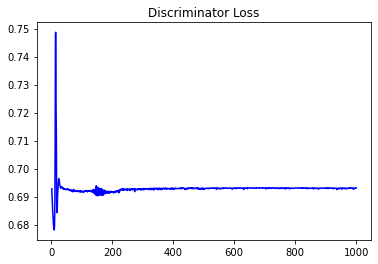

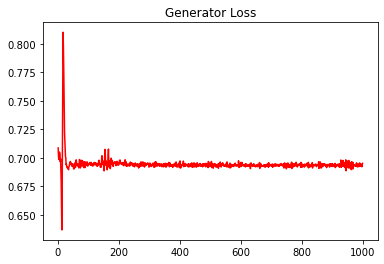

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.197713434336133


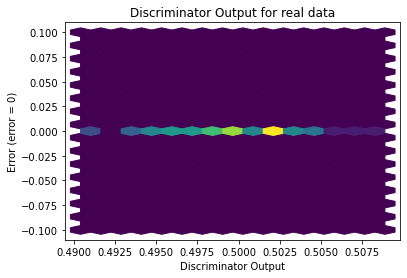

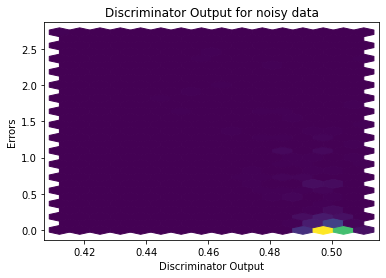

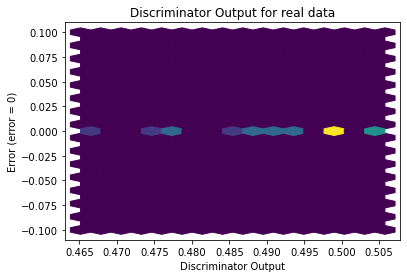

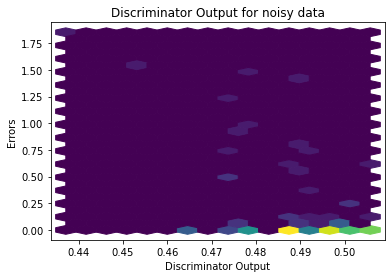

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


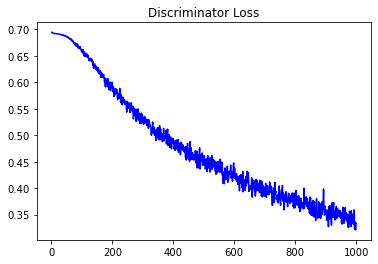

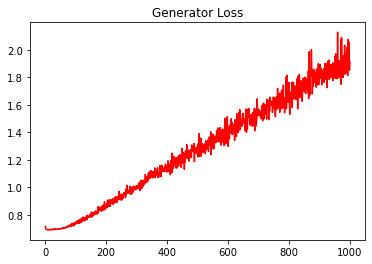

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2652219934679216


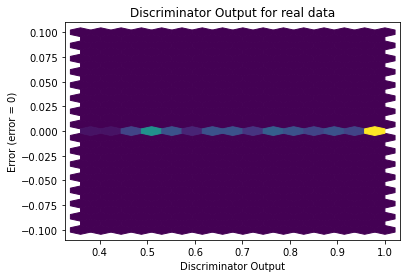

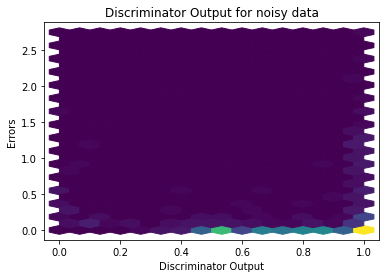

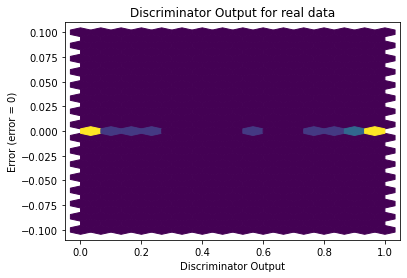

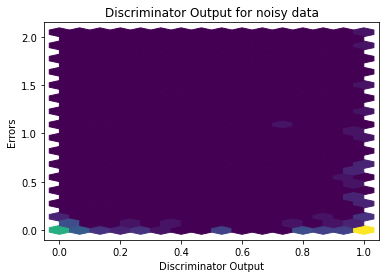

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
